This is a tutorial for basic use of abides_markets simulation.
It uses the simulator directly without the OpenAI Gym interface

In [14]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
# sys.path.append('/mnt/ccnas2/bdp/kg1118/projects/jpm/my_abides/')
from abides_core import abides
from abides_core.utils import parse_logs_df, ns_date, str_to_ns, fmt_ts
from abides_markets.orders import Side
from abides_markets.configs.circuit_breaker import build_config
from abides_markets.configs.agent_params import ExchangeConfig, NoiseAgentConfig, ValueAgentConfig, MarketMakerAgentConfig, MomentumAgentConfig, GBMOracleConfig, InstitutionalTraderAgentConfig
import os
print(os.getcwd())

c:\Users\Joel\Downloads\abides-jpmc-public-main\abides-jpmc-public-main\notebooks


## Build runnable configuration

Here we are generating/building a config from the config file rmsc04. 
The config object is a dictionnary containing key elements like, start time, end time, agents to be used, latency and computation delay models.

In [16]:
oracle_config = GBMOracleConfig(mu=1e-9, sigma=0.0135)
mm_config = MarketMakerAgentConfig(price_skew_param=4, wake_up_freq='1s', subscribe=False, subscribe_freq='1s', subscribe_num_levels=10)
value_agent_config = ValueAgentConfig(kappa_limit=0.3, kappa_mkt=0.1, mean_wakeup_gap=1e8)
momentum_agent_config = MomentumAgentConfig(beta_limit=50, beta_mkt=20, wake_up_freq='1s', subscribe=False)
exchange_config = ExchangeConfig(log_orders=True)
institutional_config = InstitutionalTraderAgentConfig(inventory=1e8, sell_frequency="00:00:02", sell_volume_factor=100)

config = build_config(seed=50, end_time="10:30:00", num_noise_agents=5, num_value_agents=10, num_mm_agents=15, num_long_momentum_agents=5, num_short_momentum_agents=5, oracle_params=oracle_config, 
                      mm_agent_params=mm_config, value_agent_params=value_agent_config, momentum_agent_params=momentum_agent_config)
config['stdout_log_level'] = 'INFO'

Noise Agents:  5
Value Agents:  10
Market Maker Agents:  15
Long Momentum Agents:  5
Short Momentum Agents:  5


In [17]:
config.keys(), config['stdout_log_level']

(dict_keys(['seed', 'start_time', 'stop_time', 'agents', 'agent_types', 'agent_latency_model', 'default_computation_delay', 'custom_properties', 'random_state_kernel', 'stdout_log_level', 'log_dir']),
 'INFO')

In [18]:
config['agent_types']

['CircuitBreakerExchangeAgent',
 'InstitutionalTraderAgent',
 'NoiseAgent',
 'NoiseAgent',
 'NoiseAgent',
 'NoiseAgent',
 'NoiseAgent',
 'ValueAgent',
 'ValueAgent',
 'ValueAgent',
 'ValueAgent',
 'ValueAgent',
 'ValueAgent',
 'ValueAgent',
 'ValueAgent',
 'ValueAgent',
 'ValueAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'POVMarketMakerAgent',
 'MomentumAgent',
 'MomentumAgent',
 'MomentumAgent',
 'MomentumAgent',
 'MomentumAgent',
 'MomentumAgent',
 'MomentumAgent',
 'MomentumAgent',
 'MomentumAgent',
 'MomentumAgent']

## Running simulation

Once the config is ready it can be run using the abides runner function.
It instanciates a simulation kernel, runs the configuration and returns an end_state that mostly contains pointers to the different agent objects.
The agents are in their final state, their internal variables can be accessed to extract informations of interests like logs.

In [19]:
end_state = abides.run(config, log_dir="simulation")

[29124] INFO abides Simulation Start Time: 2024-05-14 21:43:24.765410
[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 00:00:00, messages processed: 0, wallclock elapsed: 0.00s ---


1506
1506
percentage change: 0.0
current average: 10011.573705179282


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:37:20, messages processed: 100,000, wallclock elapsed: 28.79s ---


1491
2997
percentage change: 0.00039338502883007337
current average: 10007.635301968636


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:38:41, messages processed: 200,000, wallclock elapsed: 56.96s ---


1628
3000
percentage change: 0.00021637126380937965
current average: 10009.800666666666
1583
3000
percentage change: 0.00020479928304943516
current average: 10011.850666666667


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:40:00, messages processed: 300,000, wallclock elapsed: 95.02s ---
[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:40:32, messages processed: 400,000, wallclock elapsed: 114.49s ---


4842
3000
percentage change: 0.02063814242534982
current average: 9805.224666666667
CIRCUIT BREAKER


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:41:30, messages processed: 500,000, wallclock elapsed: 135.13s ---


CIRCUIT BREAKER END
0
3000
percentage change: 0.0
current average: 9805.224666666667
0
3000
percentage change: 0.0
current average: 9805.224666666667


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:42:08, messages processed: 600,000, wallclock elapsed: 147.85s ---
[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:42:37, messages processed: 700,000, wallclock elapsed: 172.25s ---


6552
3000
percentage change: 0.018830607111025324
current average: 9620.586333333333
0
3000
percentage change: 0.0
current average: 9620.586333333333


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:43:04, messages processed: 800,000, wallclock elapsed: 196.46s ---
[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:43:31, messages processed: 900,000, wallclock elapsed: 223.45s ---


6873
3000
percentage change: 0.03087452154250187
current average: 9323.555333333334
CIRCUIT BREAKER


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:44:06, messages processed: 1,000,000, wallclock elapsed: 248.98s ---


CIRCUIT BREAKER END
0
3000
percentage change: 0.0
current average: 9323.555333333334
0
3000
percentage change: 0.0
current average: 9323.555333333334


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:45:22, messages processed: 1,100,000, wallclock elapsed: 266.22s ---
[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:45:52, messages processed: 1,200,000, wallclock elapsed: 289.31s ---


4893
3000
percentage change: 0.05777402654623952
current average: 9862.214666666667
CIRCUIT BREAKER
CIRCUIT BREAKER END
0
3000
percentage change: 0.0
current average: 9862.214666666667
0
3000
percentage change: 0.0
current average: 9862.214666666667


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:47:14, messages processed: 1,300,000, wallclock elapsed: 307.44s ---
[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:47:46, messages processed: 1,400,000, wallclock elapsed: 331.60s ---


4809
3000
percentage change: 0.004768976163704073
current average: 9815.182
0
3000
percentage change: 0.0
current average: 9815.182


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:48:15, messages processed: 1,500,000, wallclock elapsed: 362.62s ---
[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:48:42, messages processed: 1,600,000, wallclock elapsed: 390.30s ---


5981
3000
percentage change: 0.025311739846834595
current average: 9566.742666666667
CIRCUIT BREAKER
CIRCUIT BREAKER END
0
3000
percentage change: 0.0
current average: 9566.742666666667
0
3000
percentage change: 0.0
current average: 9566.742666666667


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:50:00, messages processed: 1,700,000, wallclock elapsed: 410.80s ---
[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:50:28, messages processed: 1,800,000, wallclock elapsed: 434.99s ---


5142
3000
percentage change: 0.03032690193262567
current average: 9856.872333333333
CIRCUIT BREAKER


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:51:07, messages processed: 1,900,000, wallclock elapsed: 461.26s ---


CIRCUIT BREAKER END
0
3000
percentage change: 0.0
current average: 9856.872333333333
0
3000
percentage change: 0.0
current average: 9856.872333333333


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:52:19, messages processed: 2,000,000, wallclock elapsed: 481.04s ---
[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:52:50, messages processed: 2,100,000, wallclock elapsed: 509.67s ---


4938
3000
percentage change: 0.0009285230673408112
current average: 9866.024666666666
0
3000
percentage change: 0.0
current average: 9866.024666666666


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:53:18, messages processed: 2,200,000, wallclock elapsed: 553.34s ---
[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:53:46, messages processed: 2,300,000, wallclock elapsed: 583.77s ---


5573
3000
percentage change: 0.02577887331452707
current average: 9611.689666666667
CIRCUIT BREAKER
CIRCUIT BREAKER END
0
3000
percentage change: 0.0
current average: 9611.689666666667
0
3000
percentage change: 0.0
current average: 9611.689666666667


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:55:18, messages processed: 2,400,000, wallclock elapsed: 616.70s ---


2560
3000
percentage change: 0.03419627676285421
current average: 9940.373666666666
CIRCUIT BREAKER
CIRCUIT BREAKER END
0
3000
percentage change: 0.0
current average: 9940.373666666666
0
3000
percentage change: 0.0
current average: 9940.373666666666


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:57:11, messages processed: 2,500,000, wallclock elapsed: 643.73s ---


1527
3000
percentage change: 0.010716699751159615
current average: 10046.901666666667
0
3000
percentage change: 0.0
current average: 10046.901666666667


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:58:29, messages processed: 2,600,000, wallclock elapsed: 675.74s ---


1458
3000
percentage change: 0.000622745884676507
current average: 10040.645
0
3000
percentage change: 0.0
current average: 10040.645


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:59:44, messages processed: 2,700,000, wallclock elapsed: 709.31s ---


1683
3000
percentage change: 8.03401242317896e-06
current average: 10040.725666666667
0
3000
percentage change: 0.0
current average: 10040.725666666667
1485
3000
percentage change: 0.0006436785760869546
current average: 10034.262666666667
0
3000
percentage change: 0.0
current average: 10034.262666666667


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:01:01, messages processed: 2,800,000, wallclock elapsed: 740.87s ---


1700
3000
percentage change: 0.000569648233246736
current average: 10028.546666666667
0
3000
percentage change: 0.0
current average: 10028.546666666667


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:02:17, messages processed: 2,900,000, wallclock elapsed: 808.97s ---


1576
3000
percentage change: 0.0001462491740245996
current average: 10030.013333333334
0
3000
percentage change: 0.0
current average: 10030.013333333334


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:03:34, messages processed: 3,000,000, wallclock elapsed: 842.73s ---


1611
3000
percentage change: 6.879352769227053e-05
current average: 10029.323333333334
0
3000
percentage change: 0.0
current average: 10029.323333333334


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:04:51, messages processed: 3,100,000, wallclock elapsed: 874.53s ---


1499
3000
percentage change: 5.593597706987488e-05
current average: 10029.884333333333
0
3000
percentage change: 0.0
current average: 10029.884333333333
1454
3000
percentage change: 0.00015487051312954172
current average: 10028.331
0
3000
percentage change: 0.0
current average: 10028.331


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:06:10, messages processed: 3,200,000, wallclock elapsed: 908.92s ---


1611
3000
percentage change: 0.0005015789766014559
current average: 10033.361
0
3000
percentage change: 0.0
current average: 10033.361


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:07:26, messages processed: 3,300,000, wallclock elapsed: 943.69s ---


1547
3000
percentage change: 0.00035029803738408457
current average: 10036.875666666667
0
3000
percentage change: 0.0
current average: 10036.875666666667


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:08:44, messages processed: 3,400,000, wallclock elapsed: 977.69s ---


1512
3000
percentage change: 9.309005754008591e-05
current average: 10035.941333333334
0
3000
percentage change: 0.0
current average: 10035.941333333334
1466
3000
percentage change: 0.0005108638870747092
current average: 10030.814333333334
0
3000
percentage change: 0.0
current average: 10030.814333333334


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:10:02, messages processed: 3,500,000, wallclock elapsed: 1011.87s ---


1529
3000
percentage change: 0.00032253944952232523
current average: 10027.579
0
3000
percentage change: 0.0
current average: 10027.579


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:11:20, messages processed: 3,600,000, wallclock elapsed: 1113.62s ---


1531
3000
percentage change: 0.0007868300015386983
current average: 10035.469
0
3000
percentage change: 0.0
current average: 10035.469


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:12:39, messages processed: 3,700,000, wallclock elapsed: 1146.65s ---


1619
3000
percentage change: 0.00038692760647276477
current average: 10039.352
0
3000
percentage change: 0.0
current average: 10039.352


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:13:54, messages processed: 3,800,000, wallclock elapsed: 1180.11s ---


1542
3000
percentage change: 0.00056082636940438
current average: 10044.982333333333
0
3000
percentage change: 0.0
current average: 10044.982333333333
1502
3000
percentage change: 0.0005482007318612048
current average: 10050.489
0
3000
percentage change: 0.0
current average: 10050.489


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:15:13, messages processed: 3,900,000, wallclock elapsed: 1213.04s ---


1553
3000
percentage change: 0.000272192394486217
current average: 10053.224666666667
0
3000
percentage change: 0.0
current average: 10053.224666666667


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:16:28, messages processed: 4,000,000, wallclock elapsed: 1246.04s ---


1683
3000
percentage change: 0.00015656667906959376
current average: 10051.650666666666
0
3000
percentage change: 0.0
current average: 10051.650666666666


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:17:43, messages processed: 4,100,000, wallclock elapsed: 1282.08s ---


1532
3000
percentage change: 0.0003866694929576301
current average: 10047.764
0
3000
percentage change: 0.0
current average: 10047.764
1593
3000
percentage change: 9.176170937122541e-05
current average: 10046.842
0
3000
percentage change: 0.0
current average: 10046.842


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:19:01, messages processed: 4,200,000, wallclock elapsed: 1315.89s ---


1626
3000
percentage change: 0.00018310894773370022
current average: 10045.002333333334
0
3000
percentage change: 0.0
current average: 10045.002333333334


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:20:20, messages processed: 4,300,000, wallclock elapsed: 1347.81s ---


1617
3000
percentage change: 0.00025501902156516805
current average: 10047.564
0
3000
percentage change: 0.0
current average: 10047.564


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:21:35, messages processed: 4,400,000, wallclock elapsed: 1493.35s ---


1506
3000
percentage change: 0.0001053323306359933
current average: 10046.505666666666
0
3000
percentage change: 0.0
current average: 10046.505666666666


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:22:51, messages processed: 4,500,000, wallclock elapsed: 1530.39s ---


1468
3000
percentage change: 0.00038580578447891555
current average: 10042.629666666666
0
3000
percentage change: 0.0
current average: 10042.629666666666
1640
3000
percentage change: 0.0007181385990899862
current average: 10035.417666666666
0
3000
percentage change: 0.0
current average: 10035.417666666666


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:24:09, messages processed: 4,600,000, wallclock elapsed: 1570.42s ---


1460
3000
percentage change: 0.0005763918877583058
current average: 10029.633333333333
0
3000
percentage change: 0.0
current average: 10029.633333333333


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:25:27, messages processed: 4,700,000, wallclock elapsed: 1606.47s ---


1532
3000
percentage change: 0.0009786665514525934
current average: 10019.817666666666
0
3000
percentage change: 0.0
current average: 10019.817666666666


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:26:44, messages processed: 4,800,000, wallclock elapsed: 1639.50s ---


1599
3000
percentage change: 0.00016706890840637265
current average: 10021.491666666667
0
3000
percentage change: 0.0
current average: 10021.491666666667
1649
3000
percentage change: 0.00014113002139575734
current average: 10022.906
0
3000
percentage change: 0.0
current average: 10022.906


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:28:00, messages processed: 4,900,000, wallclock elapsed: 1674.70s ---


1602
3000
percentage change: 0.00012498038659319063
current average: 10021.653333333334
0
3000
percentage change: 0.0
current average: 10021.653333333334


[29124] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:29:18, messages processed: 5,000,000, wallclock elapsed: 1710.34s ---


1339
3000
percentage change: 0.0004965913807968515
current average: 10016.676666666666
0
3000
percentage change: 0.0
current average: 10016.676666666666
74
3000
percentage change: 2.1031592980033236e-05
current average: 10016.466
agent_types:  ['CircuitBreakerExchangeAgent', 'InstitutionalTraderAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 'Mome

[29124] INFO abides_core.kernel Event Queue elapsed: 0:28:49.794515, messages: 5,053,521, messages per second: 2921.5
[29124] INFO abides_core.kernel Mean ending value by agent type:
[29124] INFO abides_core.kernel InstitutionalTraderAgent: 952629258631
[29124] INFO abides_core.kernel NoiseAgent: 97337
[29124] INFO abides_core.kernel ValueAgent: 791291903
[29124] INFO abides_core.kernel AdaptivePOVMarketMakerAgent: 2903376271
[29124] INFO abides_core.kernel MomentumAgent: 669158
[29124] INFO abides_core.kernel Simulation ending!
[29124] INFO abides Simulation End Time: 2024-05-14 22:19:50.329048
[29124] INFO abides Time taken to run simulation: 0:36:25.563638


Writing summary log


## Retrieving results from end_state

By convention in abides_markets configuration the first agent is the exchange agent. 
It contains an order_book. By default it logs its history.

In [20]:
order_book = end_state["agents"][0].order_books["ABM"]

In [21]:
ms_list = end_state["agents"][-5].momentum_signal_list

In [22]:
np.tanh(100*np.array(ms_list))

array([0.        , 0.00899886, 0.13053673, ..., 0.09439623, 0.13887241,
       0.09448084])

In [23]:
for symbol in end_state["agents"][0].oracle.f_log:
    dfFund = pd.DataFrame(end_state["agents"][0].oracle.f_log[symbol])

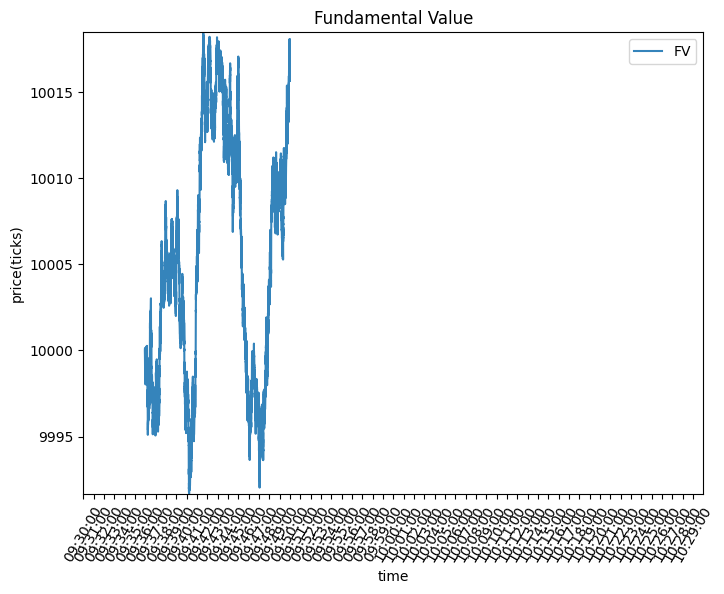

In [26]:
dfFund['time'] = dfFund['FundamentalTime'].apply( lambda x: x - ns_date(x))

start, end = str_to_ns("09:30:00"), str_to_ns("10:30:00")

dfFund = dfFund[(dfFund['time'] > start) & (dfFund['time'] < end)].copy()

y_max, y_min = dfFund.FundamentalValue.max(), dfFund.FundamentalValue.min()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(dfFund.time, dfFund.FundamentalValue, alpha=0.9, label='FV')
ax.set_ylabel("price(ticks)")
ax.set_xlabel("time")
ax.set_ylim(y_min, y_max)
ax.set_xlim(start, end)
ax.set_title('Fundamental Value')

time_mesh = np.arange(start, end, 1e9*60)
ax.set_xticks(time_mesh, [fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60)
plt.legend(loc='best')
plt.show()

### Order book history L1

L1 data snapshots for every tick can be extracted
( best bid and ask price and quantity )

In [25]:
L1 = order_book.get_L1_snapshots()

Here we plot the time series of the best bid and best ask price thoughout the simulation

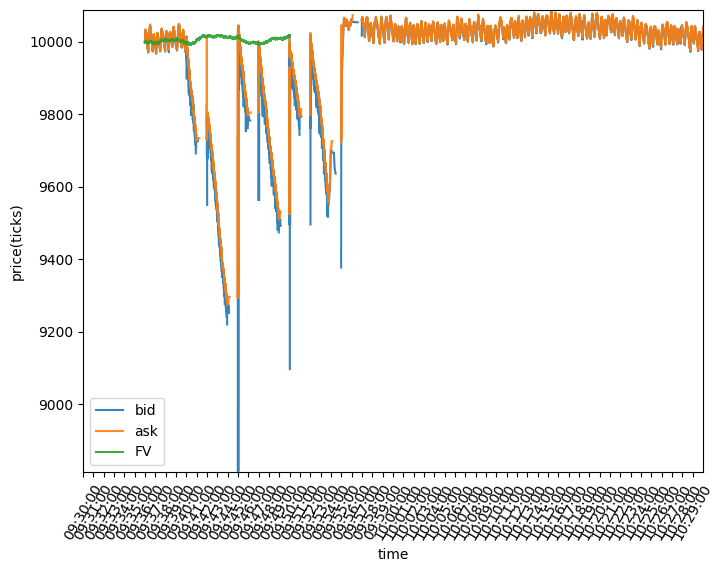

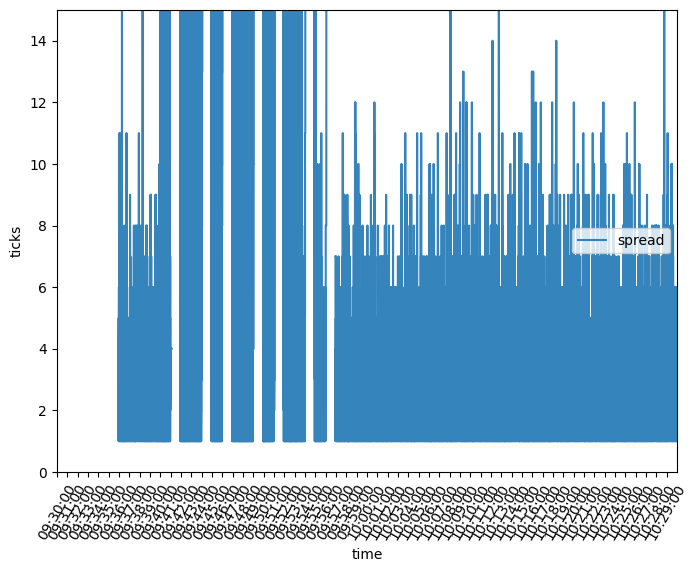

In [27]:
best_bids = pd.DataFrame(L1["best_bids"],columns=["time","price","qty"])
best_asks = pd.DataFrame(L1["best_asks"],columns=["time","price","qty"])

## All times are in ns from 1970, remove the date component to put them in ns from midnight
best_bids["time"] = best_bids["time"].apply( lambda x: x - ns_date(x) )
best_asks["time"] = best_asks["time"].apply( lambda x: x - ns_date(x) )

start, end = str_to_ns("09:30:00"), str_to_ns("10:30:00")

best_bids = best_bids[(best_bids['time'] > start) & (best_bids['time'] < end)]
best_asks = best_asks[(best_asks['time'] > start) & (best_asks['time'] < end)]

y_max, y_min = best_asks.price.max(), best_bids.price.min()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(best_bids.time,best_bids.price, alpha=0.9, label='bid')
ax.plot(best_asks.time,best_asks.price, alpha=0.9, label='ask')
ax.plot(dfFund.time, dfFund.FundamentalValue, alpha=0.9, label='FV')
ax.set_ylabel("price(ticks)")
ax.set_xlabel("time")
ax.set_ylim(y_min, y_max)
ax.set_xlim(start, end)

time_mesh = np.arange(start, end, 1e9*60)
ax.set_xticks(time_mesh, [fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60)
plt.legend(loc='best')
plt.show()

spread = best_asks.price - best_bids.price

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(best_bids.time, spread, alpha=0.9, label='spread')
ax.set_ylabel("ticks")
ax.set_xlabel("time")
ax.set_ylim(0, 15)
ax.set_xlim(start, end)

ax.set_xticks(time_mesh, [fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60)
plt.legend(loc='best')
plt.show()

### Order book history L2

L2 data snapshots for every tick can be extracted
( bids and asks price and quantity for every orderbook level. Here max depth logged is a parameter of the simulation and max number of levels we want to retrieve from the orderbook after the simulation is a parameter too)

In [28]:
L2 = order_book.get_L2_snapshots(nlevels=10)

In [29]:
L2["bids"][10000]

array([[10004.,    55.],
       [10003.,   200.],
       [10001.,   100.],
       [10000.,    20.],
       [ 9998.,   140.],
       [ 9997.,    60.],
       [ 9996.,    40.],
       [ 9995.,    40.],
       [ 9994.,    83.],
       [ 9993.,   152.]])

As an illustration we plot the time series of the fifth best bid price and fifth best ask price throughout the simulation

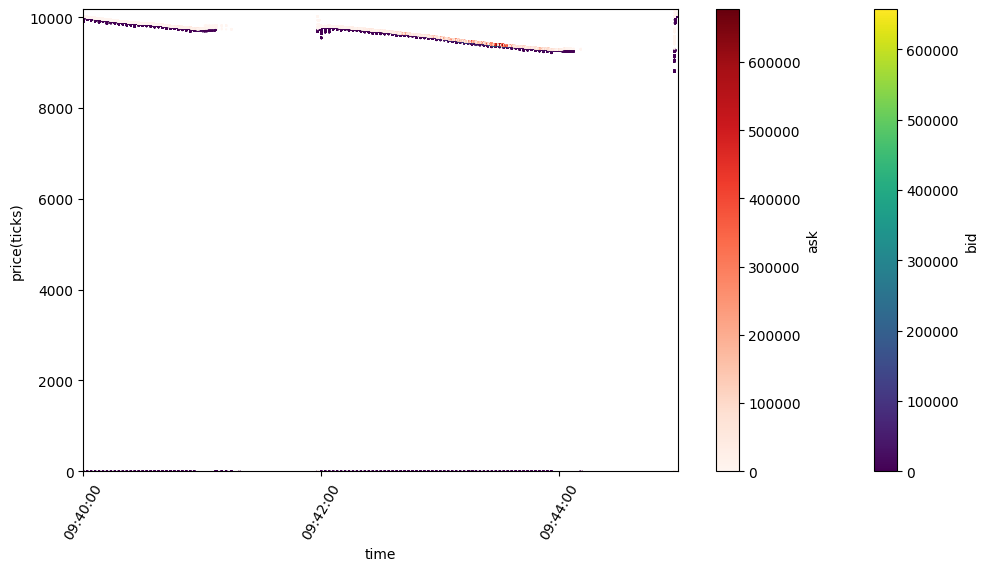

In [30]:
## plotting LOB
# start, end = 20000, 30000
times = [t - ns_date(t) for t in L2["times"] ]
start, end = str_to_ns("09:40:00"), str_to_ns("09:45:00")
left = next(x for x, val in enumerate(times) if val > start)
right = next(x for x, val in enumerate(times) if val > end)
times = times[left:right]

fig, ax = plt.subplots(figsize=(12, 6))
y_min, y_max = min(L2["bids"][left:right, 4, 0]), max(L2["asks"][left:right, 4, 0])
for i in range(8):
    im_bid = ax.scatter(times, L2["bids"][left:right, i, 0], alpha=1, s=0.3, c=L2["bids"][left:right, i, 1], cmap="viridis")
    im_ask = ax.scatter(times, L2["asks"][left:right, i, 0], alpha=1, s=0.3, c=L2["asks"][left:right, i, 1], cmap="Reds")

ax.set_ylim(y_min, y_max)
ax.set_xlim(start, end)

time_mesh = np.arange(start, end, 1e9*60*2)
ax.set_xticks(time_mesh, [fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )
ax.set_ylabel("price(ticks)")
ax.set_xlabel("time")
fig.colorbar(im_bid, ax=ax, label='bid')
fig.colorbar(im_ask, ax=ax, label='ask')

# plt.legend(loc='best')
plt.show()

### Looking at agents logs

All agents can be inspected to retrieve desired information. 
The utility parse_logs_df for instance provides a quick way to retrieve and aggregate the log variables of each agent in a single dataframe

In [23]:
logs_df = parse_logs_df( end_state )

#### Histogram of order submission times for noise agents

As an illustration we retrieve the submission times of all the orders sent by noise agent and display the histogram of all these times

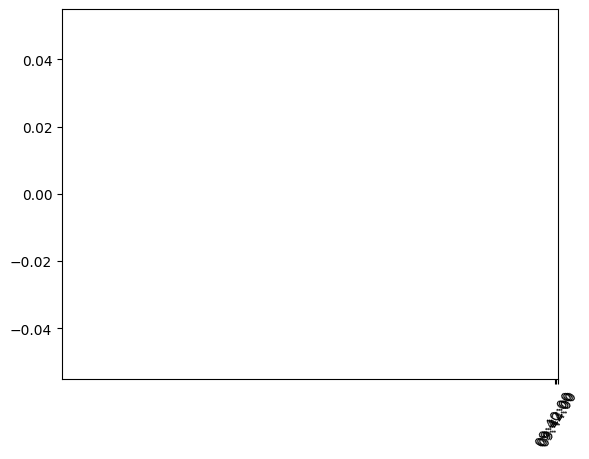

In [24]:
plt.hist( logs_df[ (logs_df.agent_type == "AdaptivePOVMarketMakerAgent") & (logs_df.EventType=="ORDER_SUBMITTED") ].EventTime.apply(lambda x: x - ns_date(x) )  )

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )




We proceed the same way for value agents as well

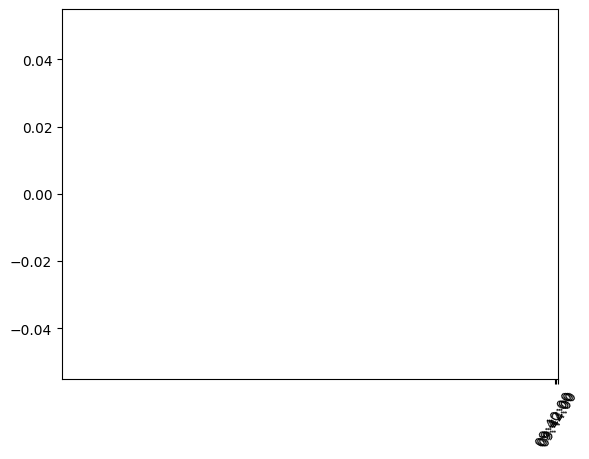

In [25]:
plt.hist( logs_df[ (logs_df.agent_type == "ValueAgent") & (logs_df.EventType=="ORDER_SUBMITTED") ].EventTime.apply(lambda x: x - ns_date(x) )  )

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )